In [272]:
#importing panda
import pandas as pd
import matplotlib.pyplot as plt

In [368]:
#reading the csv files
df_room = pd.read_csv('room_availability.csv')
df_renter = pd.read_csv('renter_interest.csv')


In [485]:
# average price for each property type to a rounded figure
average_price_each_property = round(df_room.groupby('Property Type')['Price'].mean().reset_index())
average_price_each_property.columns = ['Property Type', 'Average_price']


#printing the 5 cheapest rooms in each property type:

# Filter out the rooms that are not available 
df_filtered = df_room[df_room['Property Type'] != 'Not Available']

#  Sort the DataFrame by price in ascending order
df_sorted = df_filtered.sort_values(by='Price')


# Function to get up to 5 records with distinct prices for each property type
def get_top5_cheapest_rooms(dframe, num=5):
    """
    Function to get the top 5 cheapest records with distinct prices for each property type.

    Parameters:
    dframe: The DataFrame containing property listings, 
                       filtered to exclude any unavailable properties.
                       
    num (int): The number of distinct price records to retrieve for each property type.
             Default is 5, could be more.

    Returns:
    pd.DataFrame: A DataFrame containing up to `num` records per property type,
                  showing the cheapest rooms based on distinct prices.
    """
    result = []
     # Loop over each property type group
    for property_type, group in dframe.groupby('Property Type'):
        group = group.sort_values('Price')  # Sort by price in ascending order
        distinct_prices = set()  # Track distinct prices
        filtered_rooms = []  # Collect rooms for this property type

        # Accumulate rooms while counting distinct prices up to `num`
        for info , row in group.iterrows():
            price = row['Price']
            if len(distinct_prices) <  num or price in distinct_prices:
                filtered_rooms.append(row)
                distinct_prices.add(price)
        
        result.extend(filtered_rooms)

    # Convert result list to DataFrame
    result_df = pd.DataFrame(result)
    return result_df.to_string(index=False) #print without the index numbers from the csv file of each row  'index=False'



print("Average Prices for each Properties:")
print(f'{average_price_each_property}\n')


# Get the top records with distinct prices per property type
top5_cheapest_rooms = get_top5_cheapest_rooms(df_sorted)
# Display the results
print("Top Cheapest Rooms by Property Type:")
print(top5_cheapest_rooms)




Average Prices for each Properties:
  Property Type  Average_price
0     Apartment         1609.0
1         Condo         1640.0
2         House         1312.0

Top Cheapest Rooms by Property Type:
RoomID Homeowner       Area Property Type Number of Bedrooms  Square Feet Availability Date  Price
    H3      Nick   McKernan     Apartment                  1          400         September    500
   H15      Nick Strathcona     Apartment                  1          480               May    600
   H17    Robert     Oliver     Apartment             Studio          600           October    600
   H18      Nick Park Allen     Apartment                  1          720           October    900
   H30    George   Downtown     Apartment             Studio          800              July    960
   H37    George    Ritchie     Apartment                  1          800          February   1000
   H25      Nick  Belgravia     Apartment                  1          800            August   1000
   H21    

Property Type: Apartment, Average Price: 1609.0
5 Distinct Prices for Apartment: [500, 600, 900, 960, 1000]


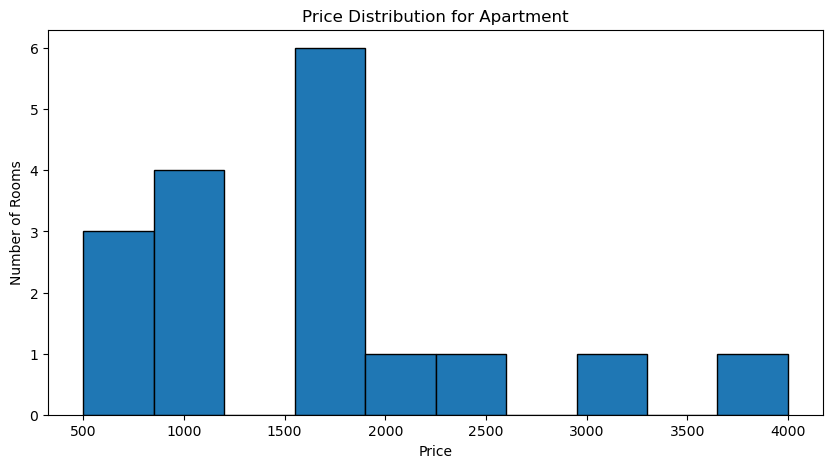

Property Type: Condo, Average Price: 1640.0
5 Distinct Prices for Condo: [600, 720, 800, 960, 1000]


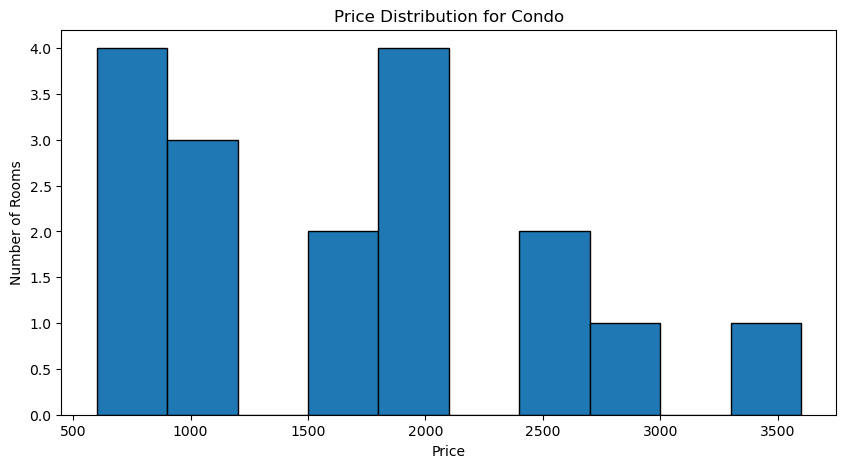

Property Type: House, Average Price: 1312.0
5 Distinct Prices for House: [500, 600, 700, 979, 1000]


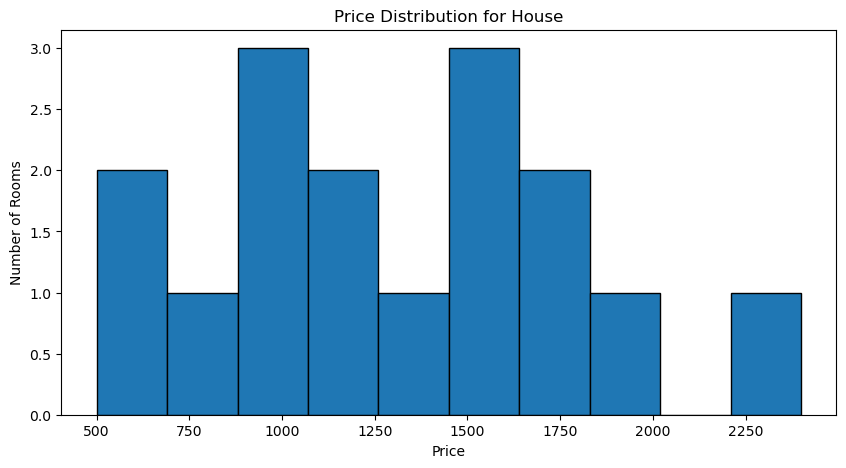

In [337]:
# Calculate average price for each property type (rounded)
average_price_each_property = round(df_room.groupby('Property Type')['Price'].mean().reset_index())
average_price_each_property.columns = ['Property Type', 'Average_price']

# Filter out the rooms that are not available 
df_filtered = df_room[df_room['Property Type'] != 'not available']

# Sort the DataFrame by price in ascending order
df_sorted = df_filtered.sort_values(by='Price')

# Display average prices and plot histograms
for info, row in average_price_each_property.iterrows():
    property_type = row['Property Type']
    average_price = row['Average_price']

    # Print the property type and average price
    print(f"Property Type: {property_type}, Average Price: {average_price}")

    # Filter the sorted DataFrame for the current property type
    property_data = df_sorted[df_sorted['Property Type'] == property_type]

    # Get distinct prices for the current property type
    distinct_prices = property_data['Price'].unique()

    # Display the 5 distinct prices
    print(f"5 Distinct Prices for {property_type}: {sorted(distinct_prices)[:5]}")

    # Plot histogram for the current property type only with un-NaN prices
    plt.figure(figsize=(10, 5))
    plt.hist(property_data['Price'], bins=10, edgecolor='black')
    plt.title(f'Price Distribution for {property_type}')
    plt.xlabel('Price')
    plt.ylabel('Number of Rooms')
    plt.show()


In [433]:
# average price for houses in each Area to a rounded figure
average_price_each_area_property = round(df_room.groupby('Area')['Price'].mean().reset_index())
average_price_each_area_property.columns = ['Area', 'Average_price']


#printing the 5 cheapest property type  in each Area:

# Filter out the rooms that are not available 
df_filtered = df_room[df_room['Property Type'] != 'not available']

#  Sort the DataFrame by price in ascending order
df_sorted = df_filtered.sort_values(by='Price')


# Function to get up to 5 records with distinct prices for each property type
def get_top5_cheapest_areas(dframe, num=5):
    """
    Function to display top 5 cheapest rooms in each area records with distinct prices for each property type in each area.

    Parameters:
    dframe: The DataFrame containing the areas with the property listings, and
                       filtered to exclude areas with any unavailable properties.
                       
    num (int): The number of distinct price records to retrieve for each property type.
             Default is 5, could be more.

    Returns:
    pd.DataFrame: A DataFrame containing up to `num` records per property type in each Area,
                  showing the areas with the cheapest rooms based on distinct prices.
    """
    result = []
      # Loop over each area group
    for property_area, group in dframe.groupby('Area'):
        group = group.sort_values('Price')  # Sort by price in ascending order
        distinct_prices = set()  # Track distinct prices
        filtered_rooms = []  # Collect rooms for this area

        # Accumulate rooms while counting distinct prices up to `num`
        for info, row in group.iterrows():
            price = row['Price']
            if len(distinct_prices) < num or price in distinct_prices:
                filtered_rooms.append(row)
                distinct_prices.add(price)
        
        # Append to result for each area
        result.extend(filtered_rooms)

    # Convert result list to DataFrame
    result_df = pd.DataFrame(result)
    return result_df.to_string(index=False) #print without the index numbers from the csv file of each row 'index=False'

# Print the average prices for each area
print("Average Prices for houses in each Area:")
print(average_price_each_area_property)

# Get the top records with distinct prices per area and print distinct prices
top5_cheapest_areas = get_top5_cheapest_areas(df_sorted)

# Display the resulting DataFrame
print("\nTop Cheapest Areas by their prices:")
print(top5_cheapest_areas)

Average Prices for houses in each Area:
         Area  Average_price
0   Belgravia         1300.0
1    Downtown         1587.0
2      Garneu         1457.0
3    McKernan         1271.0
4      Oliver         1838.0
5  Park Allen         2060.0
6     Ritchie         1200.0
7  Strathcona         1308.0

Top Cheapest Areas by their prices:
RoomID Homeowner       Area Property Type Number of Bedrooms  Square Feet Availability Date  Price
   H25      Nick  Belgravia     Apartment                  1          800            August   1000
   H12      Maya  Belgravia     Apartment                  2         1280          November   1600
    H9     Percy   Downtown         Condo             Studio          800             March    800
   H30    George   Downtown     Apartment             Studio          800              July    960
    H1    Ashley   Downtown         Condo             Studio         1000            August   1000
   H34    George   Downtown         House             Studio        

average_price_all columns: Index(['Area', 'Average_price'], dtype='object')

Area: Belgravia, Average Price: 1300.0
5 Distinct Prices for Belgravia: [1000, 1600]


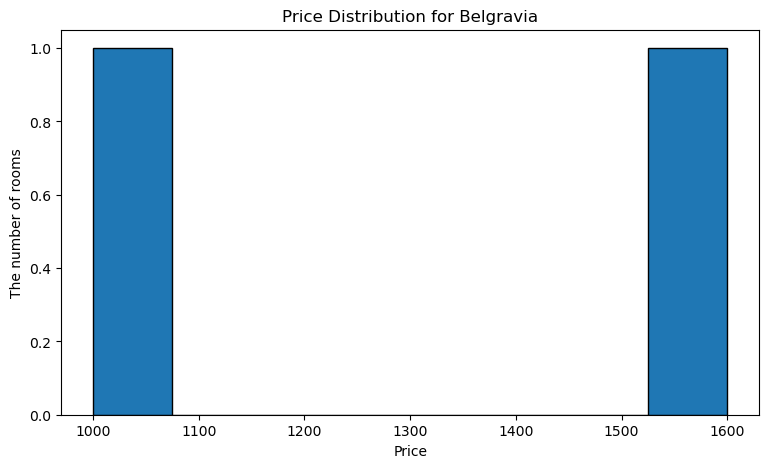


Area: Downtown, Average Price: 1587.0
5 Distinct Prices for Downtown: [800, 960, 1000, 1120, 1600]


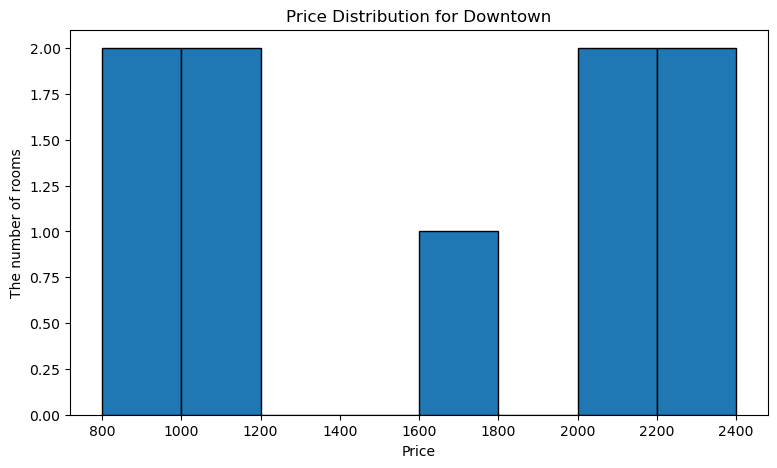


Area: Garneu, Average Price: 1457.0
5 Distinct Prices for Garneu: [700, 1200, 1400, 1500, 1600]


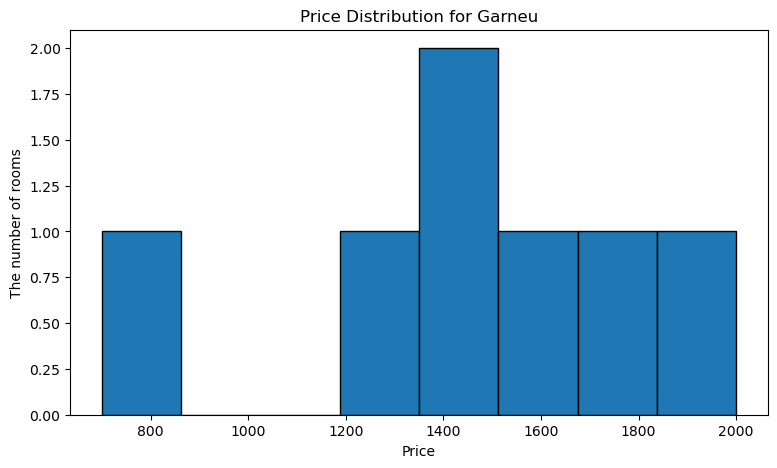


Area: McKernan, Average Price: 1271.0
5 Distinct Prices for McKernan: [500, 600, 720, 979, 1500]


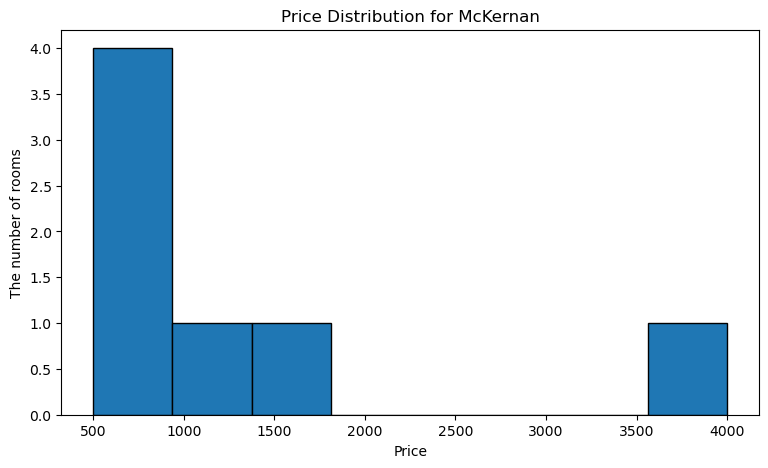


Area: Oliver, Average Price: 1838.0
5 Distinct Prices for Oliver: [600, 1080, 1620, 2000, 3200]


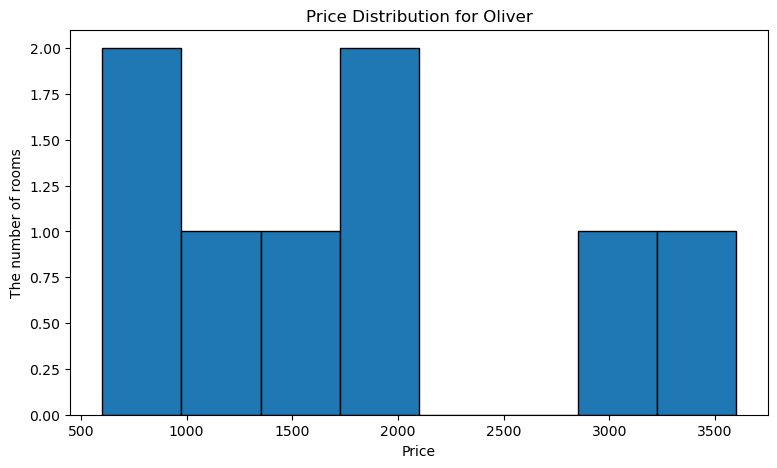


Area: Park Allen, Average Price: 2060.0
5 Distinct Prices for Park Allen: [900, 1800, 2400, 2800]


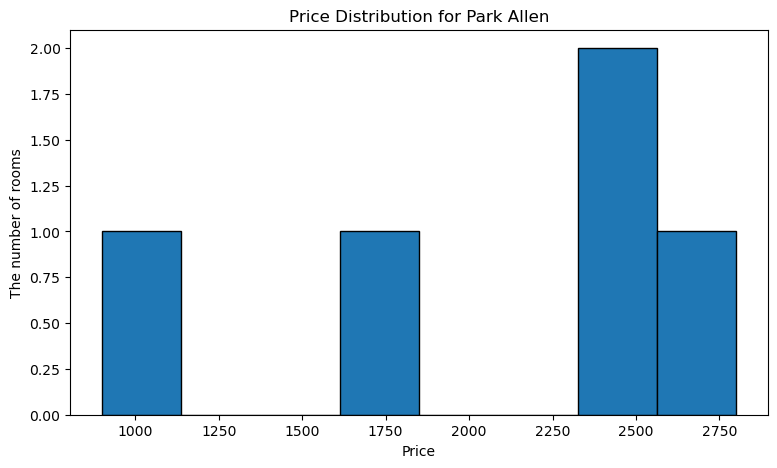


Area: Ritchie, Average Price: 1200.0
5 Distinct Prices for Ritchie: [500, 1000, 1500, 1800]


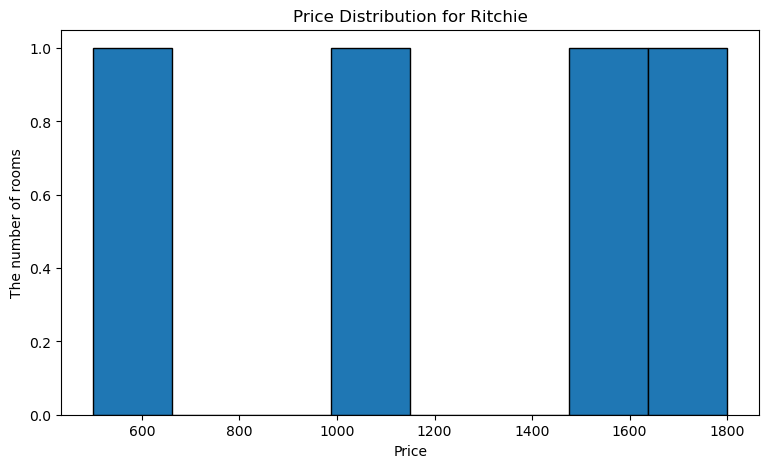


Area: Strathcona, Average Price: 1308.0
5 Distinct Prices for Strathcona: [600, 960, 1000, 1500, 1800]


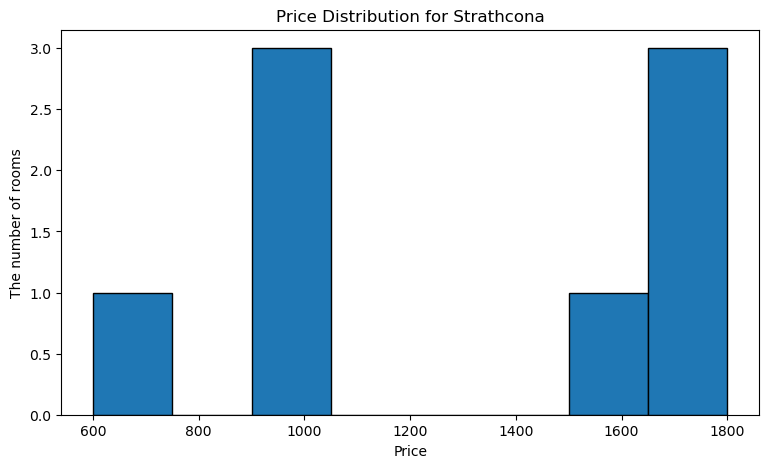

In [339]:
# Verify that 'Area' is indeed a column in df_room
# Calculate average price for each area (including not-available rooms)
average_price_all = round(df_room.groupby('Area')['Price'].mean().reset_index())
average_price_all.columns = ['Area', 'Average_price']

# Check columns in average_price_all after grouping
print("average_price_all columns:", average_price_all.columns)

# Filter out rooms that are not available and sort by price
df_filtered = df_room[df_room['Property Type'] != 'not available']
df_sorted = df_filtered.sort_values(by='Price')

# Display average prices and plot histograms for each area
for _, row in average_price_all.iterrows():
    area = row['Area']
    average_price = row['Average_price']
    
    # Print the area and average price
    print(f"\nArea: {area}, Average Price: {average_price}")

    # Filter the sorted DataFrame for the current area
    area_data = df_sorted[df_sorted['Area'] == area]
    
    # Get distinct prices for the current area
    distinct_prices = area_data['Price'].unique()
    
    # Display up to 5 distinct prices
    print(f"5 Distinct Prices for {area}: {sorted(distinct_prices)[:5]}")
    
    # Plot histogram for the current area
    plt.figure(figsize=(9, 5))
    plt.hist(area_data['Price'], bins=8, edgecolor='black')
    plt.title(f'Price Distribution for {area}')
    plt.xlabel('Price')
    plt.ylabel('The number of rooms')
    plt.show()

In [473]:
# Filter for months where rooms were not available; 'Available Date' is not 'Not Available'
available_rooms = df_room[(df_room['Availability Date'] != 'Not Available')]


month_availability = {month: 0 for month in available_rooms['Availability Date'].unique()}

# Count occurrences for each month
for month in available_rooms['Availability Date']:
    month_availability[month] += 1


# Define the correct chronological order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# # Initialize a dictionary to  hold counts for each month; Each key is a unique month from the 'Availability Date' column. and value = 0  
# Sort the dictionary by the chronological order of months
month_availability = {month: month_availability.get(month, 0) for month in month_order if month in month_availability}


# Print the month availability dictionary
print('Month'+ " " + '|' + " " + "The Number of Available Rooms\n")
for month, room_count in month_availability.items():
    print(f'{month.title()} | {room_count}\n')

Month | The Number of Available Rooms

January | 5

February | 4

March | 5

April | 2

May | 3

June | 2

July | 6

August | 8

September | 3

October | 4

November | 3

December | 2



In [475]:
# Filter out 'Not Available' rows before grouping
filtered_df = df_room[df_room['Availability Date'] != 'Not Available']


# average price for each available rooms in each month to a rounded figure
Average_p = round(filtered_df.groupby('Availability Date')['Price'].mean().reset_index())


# Initialize a dictionary to hold the months and their repective averages using the zip() 
# function to group the respective months and averages in twos and covert the returned tuples to a dictionary using dict() 
month_price = dict(zip((Average_p)[('Availability Date')],(Average_p)['Price']))


# Define the correct chronological order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Sort the month_price dictionary by the correct chronological order
month_price = {month: month_price.get(month, 0) for month in month_order if month in month_price}


# Print the average month_price dictionary
print('Month'+ " " + '|' + " " + "Average Price\n")
for month, avg_p in month_price.items():
    print(f'{month} | {avg_p}\n')

Month | Average Price

January | 1120.0

February | 1500.0

March | 1660.0

April | 1100.0

May | 853.0

June | 2200.0

July | 1890.0

August | 1215.0

September | 2033.0

October | 875.0

November | 1573.0

December | 1900.0



In [481]:
# Compile interested renters
interested_rooms = df_renter[df_renter['Interested'] == True]

# Count the number of interested renters per RoomID
room_interest_sum = interested_rooms.groupby('RoomID').size().reset_index(name='Number of Renters')

# Merge with df_room to get Homeowner and Price for each RoomID using the 'on' parameter from 'pd.merge()'
homeowner_rooms = pd.merge(room_interest_sum, df_room[['RoomID', 'Homeowner', 'Price']], on='RoomID')

# Print the information: Homeowner, RoomID, Number of Renters, Price
print('Homeowner | RoomID | The Number of Renters | Price\n')
for info, row in homeowner_rooms.iterrows():
    print(f"{row['Homeowner']} | {row['RoomID']} | {row['Number of Renters']} | {row['Price']}")

# Calculate average price per each homeowner
homeowner_avg_p = homeowner_rooms.groupby('Homeowner')['Price'].mean().reset_index(name='Average Price')

# Converting to a dictionary
homeowner_avg_p_dict = dict(zip(homeowner_avg_p['Homeowner'], homeowner_avg_p['Average Price']))

# Print the average price dictionary
print('\nHomeowner | Average Price\n')
for homeowner, avg_price in homeowner_avg_p_dict.items():
    print(f'{homeowner} | {avg_price}')


Homeowner | RoomID | The Number of Renters | Price

Diana | H11 | 1 | 1500
Maya | H12 | 1 | 1600
Anna | H13 | 1 | 2000
Ashley | H14 | 1 | 4000
Maya | H16 | 1 | 1800
Robert | H17 | 1 | 600
Ashley | H2 | 1 | 1800
Maya | H20 | 1 | 1800
George | H23 | 1 | 2400
George | H26 | 1 | 2000
Nick | H27 | 1 | 2800
Patel | H28 | 1 | 1000
Robert | H29 | 1 | 2400
Ashley | H32 | 1 | 979
Mila | H33 | 1 | 500
George | H36 | 1 | 1600
George | H37 | 1 | 1000
Diana | H38 | 1 | 600
Patel | H39 | 1 | 2400
George | H44 | 1 | 1200
Ashley | H45 | 1 | 3200
Percy | H48 | 1 | 600
Anna | H50 | 1 | 1080
Nick | H6 | 1 | 1800
Patel | H7 | 1 | 720
Mila | H8 | 1 | 2400
Percy | H9 | 1 | 800

Homeowner | Average Price

Anna | 1540.0
Ashley | 2494.75
Diana | 1050.0
George | 1640.0
Maya | 1733.3333333333333
Mila | 1450.0
Nick | 2300.0
Patel | 1373.3333333333333
Percy | 700.0
Robert | 1500.0
